In [1]:
import netCDF4 as nc
from netCDF4 import num2date,date2index
import datetime
import csv
import numpy as np
import pandas as pd
import xarray as xr
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import normalize
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

In [2]:
data = nc.Dataset('SLP.nc')

In [3]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    CDI: Climate Data Interface version 1.9.10 (https://mpimet.mpg.de/cdi)
    Conventions: COARDS
    description: Data is from NMC initialized reanalysis
(4x/day).  These are the 0.9950 sigma level values.
    platform: Model
    NCO: 20121012
    title: monthly mean slp from the NCEP Reanalysis
    dataset_title: NCEP-NCAR Reanalysis 1
    References: http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis.derived.html
    CDO: Climate Data Operators version 1.9.10 (https://mpimet.mpg.de/cdo)
    history: 15-Jun-2023 00:11:38 Subset NOAA/PSL  
    dimensions(sizes): time(732), lon(144), lat(73)
    variables(dimensions): float64 time(time), float32 lon(lon), float32 lat(lat), float32 slp(time, lat, lon)
    groups: 

In [4]:
slp = data.variables['slp']
print(slp)

<class 'netCDF4._netCDF4.Variable'>
float32 slp(time, lat, lon)
    long_name: Sea Level Pressure
    units: millibars
    _FillValue: -9.96921e+36
    missing_value: -9.96921e+36
    precision: 1
    least_significant_digit: 1
    var_desc: Sea Level Pressure
    level_desc: Sea Level
    statistic: Mean
    parent_stat: Other
    dataset: NCEP Reanalysis Derived Products
    actual_range: [ 955.56085 1082.5582 ]
unlimited dimensions: time
current shape = (732, 73, 144)
filling off


In [5]:
slp[:]

masked_array(
  data=[[[1014.3433 , 1014.3433 , 1014.3433 , ..., 1014.3433 ,
          1014.3433 , 1014.3433 ],
         [1015.1837 , 1015.1812 , 1015.169  , ..., 1015.2116 ,
          1015.2034 , 1015.1989 ],
         [1014.5749 , 1014.43414, 1014.2938 , ..., 1015.02435,
          1014.8709 , 1014.72815],
         ...,
         [1002.2749 , 1002.17865, 1002.07544, ..., 1002.50055,
          1002.44415, 1002.3654 ],
         [1001.44006, 1001.4133 , 1001.3849 , ..., 1001.5126 ,
          1001.49585, 1001.4722 ],
         [1003.4377 , 1003.4377 , 1003.4377 , ..., 1003.4377 ,
          1003.4377 , 1003.4377 ]],

        [[1014.3448 , 1014.3448 , 1014.3448 , ..., 1014.3448 ,
          1014.3448 , 1014.3448 ],
         [1015.54846, 1015.6158 , 1015.67236, ..., 1015.3348 ,
          1015.4086 , 1015.4762 ],
         [1015.97406, 1015.98315, 1015.9721 , ..., 1015.89557,
          1015.9359 , 1015.9606 ],
         ...,
         [1021.38513, 1021.45123, 1021.4347 , ..., 1020.52673,
          1

In [6]:
latitude = data.variables['lat']
print(latitude)

<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
    axis: Y
    actual_range: [ 90. -90.]
unlimited dimensions: 
current shape = (73,)
filling off


In [7]:
latitude[:]

masked_array(data=[ 90. ,  87.5,  85. ,  82.5,  80. ,  77.5,  75. ,  72.5,
                    70. ,  67.5,  65. ,  62.5,  60. ,  57.5,  55. ,  52.5,
                    50. ,  47.5,  45. ,  42.5,  40. ,  37.5,  35. ,  32.5,
                    30. ,  27.5,  25. ,  22.5,  20. ,  17.5,  15. ,  12.5,
                    10. ,   7.5,   5. ,   2.5,   0. ,  -2.5,  -5. ,  -7.5,
                   -10. , -12.5, -15. , -17.5, -20. , -22.5, -25. , -27.5,
                   -30. , -32.5, -35. , -37.5, -40. , -42.5, -45. , -47.5,
                   -50. , -52.5, -55. , -57.5, -60. , -62.5, -65. , -67.5,
                   -70. , -72.5, -75. , -77.5, -80. , -82.5, -85. , -87.5,
                   -90. ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [8]:
longitude = data.variables['lon']
print(longitude)

<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    standard_name: longitude
    long_name: Longitude
    units: degrees_east
    axis: X
    actual_range: [  0.  357.5]
unlimited dimensions: 
current shape = (144,)
filling off


In [9]:
longitude[:]

masked_array(data=[  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,
                    20. ,  22.5,  25. ,  27.5,  30. ,  32.5,  35. ,  37.5,
                    40. ,  42.5,  45. ,  47.5,  50. ,  52.5,  55. ,  57.5,
                    60. ,  62.5,  65. ,  67.5,  70. ,  72.5,  75. ,  77.5,
                    80. ,  82.5,  85. ,  87.5,  90. ,  92.5,  95. ,  97.5,
                   100. , 102.5, 105. , 107.5, 110. , 112.5, 115. , 117.5,
                   120. , 122.5, 125. , 127.5, 130. , 132.5, 135. , 137.5,
                   140. , 142.5, 145. , 147.5, 150. , 152.5, 155. , 157.5,
                   160. , 162.5, 165. , 167.5, 170. , 172.5, 175. , 177.5,
                   180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5,
                   200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5,
                   220. , 222.5, 225. , 227.5, 230. , 232.5, 235. , 237.5,
                   240. , 242.5, 245. , 247.5, 250. , 252.5, 255. , 257.5,
                   260. ,

In [10]:
time = data.variables['time']
time_ = time[:]
time_units = time.units
time_calendar = time.calendar
time_dates = num2date(time_, units=time_units, calendar=time_calendar)
start_date = datetime.datetime(1958, 1, 1)
start_index = date2index(start_date, time, select='nearest')
air_subset = data['slp'][start_index:, :, :]

In [11]:
data_ = np.array(air_subset)
data_[data_ == -9.96921e+36] = 0

In [12]:
for date in time_dates:
    print(date)

1956-01-01 00:00:00
1956-02-01 00:00:00
1956-03-01 00:00:00
1956-04-01 00:00:00
1956-05-01 00:00:00
1956-06-01 00:00:00
1956-07-01 00:00:00
1956-08-01 00:00:00
1956-09-01 00:00:00
1956-10-01 00:00:00
1956-11-01 00:00:00
1956-12-01 00:00:00
1957-01-01 00:00:00
1957-02-01 00:00:00
1957-03-01 00:00:00
1957-04-01 00:00:00
1957-05-01 00:00:00
1957-06-01 00:00:00
1957-07-01 00:00:00
1957-08-01 00:00:00
1957-09-01 00:00:00
1957-10-01 00:00:00
1957-11-01 00:00:00
1957-12-01 00:00:00
1958-01-01 00:00:00
1958-02-01 00:00:00
1958-03-01 00:00:00
1958-04-01 00:00:00
1958-05-01 00:00:00
1958-06-01 00:00:00
1958-07-01 00:00:00
1958-08-01 00:00:00
1958-09-01 00:00:00
1958-10-01 00:00:00
1958-11-01 00:00:00
1958-12-01 00:00:00
1959-01-01 00:00:00
1959-02-01 00:00:00
1959-03-01 00:00:00
1959-04-01 00:00:00
1959-05-01 00:00:00
1959-06-01 00:00:00
1959-07-01 00:00:00
1959-08-01 00:00:00
1959-09-01 00:00:00
1959-10-01 00:00:00
1959-11-01 00:00:00
1959-12-01 00:00:00
1960-01-01 00:00:00
1960-02-01 00:00:00


In [13]:
data_

array([[[1012.9961 , 1012.9961 , 1012.9961 , ..., 1012.9961 ,
         1012.9961 , 1012.9961 ],
        [1011.27997, 1011.2793 , 1011.2865 , ..., 1011.2904 ,
         1011.2788 , 1011.279  ],
        [1009.7007 , 1009.5694 , 1009.4475 , ..., 1010.13617,
         1009.9895 , 1009.8436 ],
        ...,
        [ 990.54675,  990.39264,  990.2639 , ...,  991.0222 ,
          990.871  ,  990.7112 ],
        [ 989.99097,  989.9565 ,  989.91583, ...,  990.1026 ,
          990.06866,  990.02954],
        [ 990.6226 ,  990.6226 ,  990.6226 , ...,  990.6226 ,
          990.6226 ,  990.6226 ]],

       [[1021.55176, 1021.55176, 1021.55176, ..., 1021.55176,
         1021.55176, 1021.55176],
        [1020.8135 , 1020.8164 , 1020.8158 , ..., 1020.7847 ,
         1020.79895, 1020.80505],
        [1020.3079 , 1020.2328 , 1020.15265, ..., 1020.44244,
         1020.414  , 1020.36755],
        ...,
        [1017.1109 , 1017.2514 , 1017.3432 , ..., 1016.1883 ,
         1016.6094 , 1016.9082 ],
        [101

In [14]:
np.max(data_)

1082.5582

In [15]:
data_.shape

(708, 73, 144)

In [16]:
len(data_)

708

In [17]:
num_years = data_.shape[0] // 12
num_months = data_.shape[0] // num_years

In [18]:
num_years

59

In [19]:
num_months

12

In [20]:
data_reshaped = np.reshape(data_, (len(data_) // 12, 12, 73, 144))

In [21]:
import numpy as np

def average_lat_lon(data):
    """Averages the latitude and longitude coordinates in a multidimensional array.

    Args:
        data: A multidimensional array with dimensions (years, months, lat, lon).

    Returns:
        A multidimensional array with dimensions (years, months, 18, 18).
    """

    lat_avg_size = data.shape[2] // 18
    lon_avg_size = data.shape[3] // 18

    # Calculate the new shape for latitude and longitude
    new_lat_shape = 18
    new_lon_shape = 18

    # Create an empty array to store the averaged data
    averaged_data = np.zeros((data.shape[0], data.shape[1], new_lat_shape, new_lon_shape))

    # Iterate over latitude and longitude ranges
    for lat_idx in range(new_lat_shape):
        lat_range_start = lat_idx * lat_avg_size
        lat_range_end = (lat_idx + 1) * lat_avg_size

        for lon_idx in range(new_lon_shape):
            lon_range_start = lon_idx * lon_avg_size
            lon_range_end = (lon_idx + 1) * lon_avg_size

            # Select the subset of data for averaging
            subset = data[:, :, lat_range_start:lat_range_end, lon_range_start:lon_range_end]

            # Calculate the average along the latitude and longitude dimensions
            averaged_value = np.mean(subset, axis=(2, 3))

            # Store the averaged data
            averaged_data[:, :, lat_idx, lon_idx] = averaged_value

    return averaged_data




In [22]:
 avg = average_lat_lon(data_reshaped)

In [23]:
avg.shape

(59, 12, 18, 18)

In [24]:
avg[1,1,:,1]

array([ 996.66333008,  993.74938965, 1008.9876709 , 1020.97827148,
       1026.74658203, 1023.11108398, 1019.51367188, 1011.5411377 ,
       1008.49072266, 1010.76477051, 1009.17785645, 1009.2901001 ,
       1012.33746338, 1010.50640869,  995.78729248,  986.86450195,
       1000.59100342, 1010.33258057])

In [25]:
final= np.reshape(avg, (len(data_) // 12, 12, 324))

In [26]:
final.shape

(59, 12, 324)

In [27]:
np.max(final)

1068.2418212890625

In [28]:
np.min(final)

963.00732421875

In [29]:
ff= final.reshape(324,708)
ff.shape

(324, 708)

In [30]:
import numpy as np

def calculate_monthly_anomaliess(data):
    """Calculate monthly anomalies and mean for a given dataset.

    Args:
        data: A multidimensional array with dimensions (years, months, latlon).

    Returns:
        monthly_anomalies: An array with monthly anomalies of the same shape as the input data.
        monthly_mean: A multidimensional array with dimensions (months, latlon) representing the mean for each month.
    """


    anomalies = np.zeros((59,12,324))
    for i in range(data.shape[2]):
        for j in range(data.shape[1]):
            month = data[:, j, i]
            monthly_mean = np.mean(month)
            anomalies[:, j, i] = month - monthly_mean
    return anomalies

def min_max_normalize(data):
    """Perform min-max normalization on the data.

    Args:
        data: A numpy array.

    Returns:
        The normalized data with values ranging from -1 to 1.
    """
    min_val = np.min(data)
    max_val = np.max(data)
    normalized_data = (data - min_val) / (max_val - min_val)  # Normalize to the range [0, 1]
    normalized_data = 2 * normalized_data - 1  # Scale to the range [-1, 1]

    return normalized_data




In [31]:
    
import numpy as np

def anomaliess(data):
    anomaliess = np.zeros((data.shape[0], data.shape[1], data.shape[2]))

    for i in range(data.shape[2]):
        for j in range(data.shape[1]):
            month = data[:, j, i]
            monthly_mean = np.mean(month)
            anomaliess[:, j, i] = month - monthly_mean

    return anomaliess



In [32]:
anomalies = calculate_monthly_anomaliess(final)

In [33]:
anomalies

array([[[-1.50396108e+00, -1.53320830e+00, -1.24338958e+00, ...,
         -3.46002611e+00, -5.38591495e+00, -7.67918887e+00],
        [ 8.19513043e+00,  7.96406684e+00,  7.36427850e+00, ...,
          3.96116819e+00,  2.44820495e+00,  1.52157851e+00],
        [ 1.05557003e+01,  1.03183945e+01,  9.72070416e+00, ...,
         -8.80232472e-01, -1.12285032e+00, -1.78090551e+00],
        ...,
        [-2.63983775e+00, -2.60223596e+00, -2.42224845e+00, ...,
          4.57788500e-01,  6.90111063e-02, -9.60645773e-01],
        [-5.22499214e-01, -6.16814048e-01, -3.80430060e-01, ...,
          1.64585023e+00,  6.45614365e-01, -5.83964720e-01],
        [ 9.30282851e+00,  9.73691261e+00,  1.01901587e+01, ...,
         -4.53491004e+00, -6.10223596e+00, -7.68889864e+00]],

       [[ 1.15283265e+01,  1.02210031e+01,  9.08919098e+00, ...,
         -1.89569506e+00, -2.01451602e+00, -2.14684024e+00],
        [-1.50244741e+01, -1.54656817e+01, -1.56233314e+01, ...,
         -1.29395876e+00, -2.78989320e

In [34]:
normalized_anomalies = min_max_normalize(anomalies)
normalized_anomalies

array([[[-5.89399084e-02, -6.00680755e-02, -4.88887582e-02, ...,
         -1.34392150e-01, -2.08680390e-01, -2.97139953e-01],
        [ 3.15187834e-01,  3.06274907e-01,  2.83138981e-01, ...,
          1.51869163e-01,  9.35089010e-02,  5.77656920e-02],
        [ 4.06243235e-01,  3.97089527e-01,  3.74034527e-01, ...,
         -3.48805235e-02, -4.42391390e-02, -6.96226199e-02],
        ...,
        [-1.02754628e-01, -1.01304196e-01, -9.43614509e-02, ...,
          1.67316058e-02,  1.73510762e-03, -3.79823446e-02],
        [-2.10815057e-02, -2.47195574e-02, -1.56014036e-02, ...,
          6.25592849e-02,  2.39767037e-02, -2.34524444e-02],
        [ 3.57915607e-01,  3.74659743e-01,  3.92143022e-01, ...,
         -1.75854167e-01, -2.36311387e-01, -2.97514493e-01]],

       [[ 4.43760817e-01,  3.93332800e-01,  3.49674864e-01, ...,
         -7.40504524e-02, -7.86337909e-02, -8.37379969e-02],
        [-5.80473188e-01, -5.97492103e-01, -6.03573200e-01, ...,
         -5.08393875e-02, -1.08542789e

In [35]:
normalized_anomalies.shape

(59, 12, 324)

In [36]:
np.max(np.abs(anomalies))

25.948574260129817

In [37]:
num_positive_values = np.sum(anomalies > 0)

# Find the number of negative values
num_negative_values = np.sum(anomalies < 0)

# Find the number of zero values (optional)
num_zero_values = np.sum(anomalies == 0)

print("Number of positive values:", num_positive_values)
print("Number of negative values:", num_negative_values)
print("Number of zero values:", num_zero_values)

Number of positive values: 115769
Number of negative values: 113623
Number of zero values: 0


In [38]:
anomalies.shape

(59, 12, 324)

In [39]:
input_dim = 324
hidden_dim = 65
input_layer = Input(shape = (input_dim,))
hidden_layer = Dense(hidden_dim,activation='tanh')(input_layer)
output_layer = Dense(input_dim,activation='linear')(hidden_layer)

In [40]:
input_data = normalized_anomalies.reshape(-1, input_dim)
input_data.shape

(708, 324)

In [41]:
autoencoder = Model(inputs=input_layer, outputs=output_layer)

In [42]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [43]:
autoencoder.fit(input_data, input_data, epochs=10
                , batch_size=8)

Epoch 1/10
89/89 [==============================] - 3s 4ms/step - loss: 0.0143
Epoch 2/10
89/89 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 3/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 4/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 5/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 6/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 7/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 8/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 9/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 10/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0015


In [44]:
encoded_data = autoencoder.predict(input_data)

23/23 [==============================] - 0s 3ms/step


In [45]:
encoded_data.shape

(708, 324)

In [46]:
decoded_data = autoencoder.predict(encoded_data)

23/23 [==============================] - 0s 2ms/step


In [47]:
decoded_data.shape

(708, 324)

In [48]:
weights = autoencoder.get_weights()[0]  # Get the weights of the first layer (between input and hidden)

In [49]:
weights.shape

(324, 65)

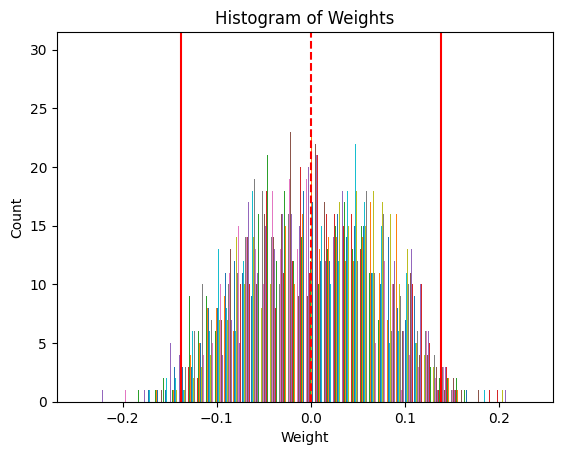

In [50]:
import matplotlib.pyplot as plt
# Calculate the mean and standard deviation of the weights.
mean = np.mean(weights)
sigma = np.std(weights)

# Plot a histogram of the weights.
plt.hist(weights, bins=50)
plt.axvline(mean, color='red', linestyle='dashed')
plt.axvline(mean + 2*sigma, color='red')
plt.axvline(mean - 2*sigma, color='red')
plt.title('Histogram of Weights')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

In [51]:
weight = weights.T
weight

array([[-0.0116913 ,  0.06480742,  0.09055109, ...,  0.0552847 ,
         0.01331308, -0.03312656],
       [ 0.00337586,  0.02521425, -0.08824559, ...,  0.06896215,
        -0.13498515, -0.07270214],
       [ 0.10367417, -0.06115923, -0.0802016 , ..., -0.0323868 ,
        -0.00789925, -0.07400603],
       ...,
       [-0.08357964, -0.02839693,  0.02673633, ..., -0.01596207,
         0.01417935, -0.02106373],
       [-0.03100049,  0.08346406, -0.01270895, ..., -0.04823292,
        -0.01434801, -0.09370977],
       [ 0.03158059,  0.12431655,  0.02899651, ..., -0.03861185,
        -0.10257173, -0.10977357]], dtype=float32)

In [52]:
weight.shape

(65, 324)

In [53]:
def Tweights(weight):
    num = []

    for i in range(weight.shape[0]):
        weight_mean = np.mean(weight[i,:])
        weight_std = np.std(weight[i,:])
        threshold = weight_mean + 1.1* weight_std
        nodes_with_weight_above_threshold = np.sum(weight[i, :] > threshold)
        ten_percent_nodes = int(0.1 * weight.shape[1])
        if nodes_with_weight_above_threshold >= ten_percent_nodes:
            num.append(nodes_with_weight_above_threshold)
            print(i,nodes_with_weight_above_threshold,threshold)

    return num

In [54]:
 we= Tweights(weight)

0 54 0.08272136468440294
1 49 0.08313987087458373
2 48 0.08238050099462271
3 49 0.07752254295628519
4 44 0.07965323273092509
5 48 0.0781936365296133
6 40 0.07058894839137793
7 45 0.07926228342112154
8 49 0.07756748502142728
9 49 0.07104565538465978
10 51 0.07582446588203312
11 43 0.07676673121750355
12 49 0.0711920767556876
13 47 0.0816408614628017
14 46 0.08011630233377219
15 45 0.08122870465740561
16 51 0.0770261882338673
17 46 0.08342359270900489
18 47 0.07649828682770021
19 46 0.07010860471054912
20 50 0.06862710143905133
21 52 0.07468441440723837
22 47 0.07559415919240564
23 45 0.07802182957530023
24 48 0.06381627833470703
25 53 0.07255912353284658
26 51 0.07884341429453344
27 53 0.07836913677165286
28 48 0.08260479057207704
29 45 0.07853289465419949
30 51 0.07737956452183425
31 52 0.07161887981928886
32 51 0.08519781641662122
33 48 0.07420666308607907
34 51 0.07917503924109043
35 47 0.07458899568882771
36 52 0.07001513056457043
37 51 0.06640752875246109
38 39 0.0798886463046074
3

In [55]:
len(we)

65

In [56]:
pred = np.zeros((65,708))
for i in range(weight.shape[0]):
    weight_mean = np.mean(weight[i,:])
    weight_std = np.std(weight[i,:])
    threshold = weight_mean + 1.1* weight_std
    nodes_with_weight_above_threshold = np.sum(weight[i, :] > threshold)
    ten_percent_nodes = int(0.1 * weight.shape[1])
    if nodes_with_weight_above_threshold >= ten_percent_nodes:
        for h in range(input_data.shape[0]): 
            pred_i = 0
            for j in range(weight.shape[1]):
                weight_value = weight[i,j]
                if weight_value > threshold:
                    pp = np.sum(weight_value*input_data[h,j])
                    pred_i += pp
                    pred[i,h] = pred_i
                

print(pred)

[[-0.36690951  0.14682852  0.34258774 ... -0.03220731 -0.16261644
   0.13014421]
 [-0.12412738  0.25451366  0.55188101 ...  0.08661671  0.3728081
   0.11061678]
 [ 0.04887903  0.27604445  0.26137139 ... -0.25494441 -0.05110068
  -0.31240488]
 ...
 [-0.07467775  0.39324681  0.35338737 ... -0.11050363 -0.05097882
  -0.1416948 ]
 [-0.3039941  -0.10730271  0.17058653 ... -0.11083906  0.08263937
   0.1950126 ]
 [-0.21593596  0.15886396  0.390129   ...  0.17962723 -0.17586316
  -0.11592173]]


In [57]:
number_of_zeros = np.count_nonzero( pred == 0)

In [58]:
number_of_zeros

0

In [59]:
pred.shape

(65, 708)

In [60]:
predd = pred[0,:].reshape(59,12)
predd

array([[-0.36690951,  0.14682852,  0.34258774,  0.08941314,  0.02919698,
        -0.01866821,  0.21084104, -0.0322972 , -0.19543501, -0.22804922,
        -0.05900604, -0.13672039],
       [ 0.05341854,  0.04116787, -0.14944156,  0.09694448,  0.14156657,
         0.3631719 ,  0.26822026,  0.27789549,  0.04789762,  0.03951519,
        -0.17049301, -0.08769221],
       [ 0.15608448,  0.09991522,  0.05159504,  0.26793978,  0.21860558,
         0.08294351,  0.01119531,  0.34786393,  0.41705464,  0.05353345,
        -0.17339554, -0.21509092],
       [-0.34269659,  0.08246265, -0.1248168 ,  0.17908189, -0.04325787,
         0.00431283,  0.15258119, -0.01215619,  0.10463397, -0.01471797,
        -0.04802499,  0.02286774],
       [-0.05991306, -0.00433196,  0.13222103, -0.19307049,  0.12026216,
         0.06598522,  0.0452457 ,  0.06722372, -0.3327498 ,  0.1827073 ,
        -0.13045477, -0.07560046],
       [ 0.09985471, -0.13725766,  0.10092031,  0.18366353, -0.02664052,
         0.35961973,  

In [61]:
df = pd.read_csv("enso_index.csv")
df

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,1958,28.33,28.24,28.27,28.27,28.31,27.99,27.32,26.85,26.40,26.45,26.75,26.62
1,1959,27.07,27.18,27.47,27.88,27.70,27.37,26.44,26.09,25.92,26.24,26.04,26.18
2,1960,26.27,26.29,26.98,27.49,27.68,27.24,26.88,26.70,26.44,26.22,26.26,26.22
3,1961,26.23,26.56,26.94,27.36,27.75,27.67,26.89,26.19,25.78,25.71,26.07,25.97
4,1962,25.96,26.19,26.80,27.13,27.05,27.08,26.76,26.33,25.94,25.97,25.75,25.67
5,1963,25.77,26.22,27.18,27.78,27.63,27.62,27.78,27.48,27.40,27.36,27.47,27.62
6,1964,27.34,27.13,27.02,26.95,26.82,26.59,26.33,25.60,25.32,25.37,25.26,25.23
7,1965,25.66,26.19,26.94,27.38,27.99,28.09,27.90,27.97,28.01,28.17,28.12,27.96
8,1966,27.67,27.55,28.21,28.16,27.55,27.64,27.33,26.48,26.27,26.22,26.23,26.03
9,1967,25.88,26.11,26.50,26.74,27.35,27.47,26.97,26.44,25.86,25.97,26.08,25.95


In [62]:
df['avg'] = df[['jun', 'jul', 'aug', 'sep']].mean(axis=1)

In [63]:
df

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,avg
0,1958,28.33,28.24,28.27,28.27,28.31,27.99,27.32,26.85,26.40,26.45,26.75,26.62,27.1400
1,1959,27.07,27.18,27.47,27.88,27.70,27.37,26.44,26.09,25.92,26.24,26.04,26.18,26.4550
2,1960,26.27,26.29,26.98,27.49,27.68,27.24,26.88,26.70,26.44,26.22,26.26,26.22,26.8150
3,1961,26.23,26.56,26.94,27.36,27.75,27.67,26.89,26.19,25.78,25.71,26.07,25.97,26.6325
4,1962,25.96,26.19,26.80,27.13,27.05,27.08,26.76,26.33,25.94,25.97,25.75,25.67,26.5275
5,1963,25.77,26.22,27.18,27.78,27.63,27.62,27.78,27.48,27.40,27.36,27.47,27.62,27.5700
6,1964,27.34,27.13,27.02,26.95,26.82,26.59,26.33,25.60,25.32,25.37,25.26,25.23,25.9600
7,1965,25.66,26.19,26.94,27.38,27.99,28.09,27.90,27.97,28.01,28.17,28.12,27.96,27.9925
8,1966,27.67,27.55,28.21,28.16,27.55,27.64,27.33,26.48,26.27,26.22,26.23,26.03,26.9300
9,1967,25.88,26.11,26.50,26.74,27.35,27.47,26.97,26.44,25.86,25.97,26.08,25.95,26.6850


In [64]:
predd = pred[1,:].reshape(59,12)
        # Create year and month ranges
years = pd.date_range(start='1958', end='2016', freq='YS').year
months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
        # Create the DataFrame
dff = pd.DataFrame(predd, index=years, columns=months)
dff = dff.reset_index()
dff['enso_avg'] = df['avg'].copy()

In [65]:
dff['June'][0]

0.0753981913258091

In [66]:
dff

,index,January,February,March,April,May,June,July,August,September,October,November,December,enso_avg
0,1958,-0.124127,0.254514,0.551881,0.416524,0.211003,0.075398,0.480300,0.012839,-0.353296,0.141688,-0.130130,-0.031910,27.1400
1,1959,0.126257,-0.188381,-0.490858,0.434026,0.678894,0.326197,0.446534,0.474565,0.040970,0.210530,-0.213591,-0.043517,26.4550
2,1960,0.168844,0.120775,0.011021,0.703025,0.594219,-0.012053,0.326064,0.757645,0.452260,-0.083132,-0.048562,-0.123491,26.8150
3,1961,-0.074183,0.015634,0.127574,0.062133,0.290761,0.414682,0.147107,0.067004,0.096080,0.148246,-0.230297,-0.375754,26.6325
4,1962,-0.391327,0.081122,0.232771,-0.154069,0.012413,0.569663,-0.054759,0.072178,0.045287,0.298768,0.151140,-0.109820,26.5275
5,1963,-0.372311,-0.316795,0.022712,0.280549,0.239751,0.330344,0.363555,1.123397,0.309961,0.133600,-0.187995,-0.120022,27.5700
6,1964,0.284172,0.106330,0.066608,0.331585,0.224756,0.538157,0.591380,0.816451,0.251585,-0.008940,0.443414,0.353615,25.9600
7,1965,0.159471,0.843982,0.320644,0.295556,0.842284,0.309175,0.513766,0.290381,0.501042,0.436634,0.258483,0.499577,27.9925
8,1966,0.132767,0.576645,1.036599,0.675812,0.494370,-0.109401,0.311682,0.209464,0.116356,-0.095306,0.256021,0.309428,26.9300
9,1967,0.155909,-0.037725,0.185719,-0.065174,0.116012,0.199352,0.172843,0.127094,0.181667,-0.113317,0.082054,-0.047044,26.6850


In [67]:
dff.loc[-1] = [1957,0,0,0,0,0, dff['June'][0],dff['July'][0],dff['August'][0], dff['September'][0],dff['October'][0],dff['November'][0],dff['December'][0],dff['enso_avg'][0]]

dff.index = dff.index + 1  # shifting index
dff = dff.sort_index() 

In [68]:
dff

,index,January,February,March,April,May,June,July,August,September,October,November,December,enso_avg
0,1957.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.075398,0.480300,0.012839,-0.353296,0.141688,-0.130130,-0.031910,27.1400
1,1958.0,-0.124127,0.254514,0.551881,0.416524,0.211003,0.075398,0.480300,0.012839,-0.353296,0.141688,-0.130130,-0.031910,27.1400
2,1959.0,0.126257,-0.188381,-0.490858,0.434026,0.678894,0.326197,0.446534,0.474565,0.040970,0.210530,-0.213591,-0.043517,26.4550
3,1960.0,0.168844,0.120775,0.011021,0.703025,0.594219,-0.012053,0.326064,0.757645,0.452260,-0.083132,-0.048562,-0.123491,26.8150
4,1961.0,-0.074183,0.015634,0.127574,0.062133,0.290761,0.414682,0.147107,0.067004,0.096080,0.148246,-0.230297,-0.375754,26.6325
5,1962.0,-0.391327,0.081122,0.232771,-0.154069,0.012413,0.569663,-0.054759,0.072178,0.045287,0.298768,0.151140,-0.109820,26.5275
6,1963.0,-0.372311,-0.316795,0.022712,0.280549,0.239751,0.330344,0.363555,1.123397,0.309961,0.133600,-0.187995,-0.120022,27.5700
7,1964.0,0.284172,0.106330,0.066608,0.331585,0.224756,0.538157,0.591380,0.816451,0.251585,-0.008940,0.443414,0.353615,25.9600
8,1965.0,0.159471,0.843982,0.320644,0.295556,0.842284,0.309175,0.513766,0.290381,0.501042,0.436634,0.258483,0.499577,27.9925
9,1966.0,0.132767,0.576645,1.036599,0.675812,0.494370,-0.109401,0.311682,0.209464,0.116356,-0.095306,0.256021,0.309428,26.9300


In [69]:
dff = dff.drop('index',axis=1)

0 February 0.05337085441021949 August -0.2951926569324291
1 March 0.009031793376587256 April -0.10067523136303393
2 December 0.04708750580143391 July -0.24234086127075233
3 September 0.07267016371713117 April -0.27921313874592146
4 May 0.1465898636364152 July -0.25482614680249066
5 May 0.09705075758141776 November -0.32706766347842176
6 September 0.13180089374378964 August -0.22091911641820997
7 September 0.142317946353895 April -0.3363121432725251
8 September 0.04810473131594568 March -0.189824200751482
9 May -0.0050241084125664266 April -0.30000750241241847
10 November 0.14940571830916255 March -0.14714398005779553
11 August 0.01542049209086703 July -0.21973316164887632
12 September 0.050808832859975984 April -0.14938464846219984
13 November 0.1847694871884168 December -0.07243407259717256
14 December 0.0987168876158236 April -0.24245478942275933
15 September -0.005255195644667912 April -0.43246273788066664
16 September -0.0212102634217477 August -0.1817497149623063
17 January 0.1173

In [125]:
def potential_predictors_new(data):
    top_correlation = []
    highest_correlation_index_list = []
    for i in range(65):
        pred_pres = data[i,:].reshape(59,12)
        # Create year and month ranges
        years = pd.date_range(start='1958', end='2016', freq='YS').year
        months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
        # Create the DataFrame
        
        df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
        df_pres = df_pres.reset_index()
        df_pres['enso_avg'] = df['avg'].copy()
        df_pres.loc[-1] = [1957,0,0,0,0,0, df_pres['June'][0],df_pres['July'][0],df_pres['August'][0], df_pres['September'][0],df_pres['October'][0],df_pres['November'][0],df_pres['December'][0],df_pres['enso_avg'][0]]
        df_pres.index = df_pres.index + 1  # shifting index
        df_pres = df_pres.sort_index() 
        df_pres= df_pres.drop('index',axis=1)
        df_6 = df_pres.iloc[1:, :5]
        df_6 = df_6.reset_index()
        df_12 = df_pres.iloc[0:-1, 6:12]
        df_12 = df_12.reset_index()
        df_13 = df_pres.iloc[1:, [12]]
        df_13 = df_13.reset_index()
        df_last = pd.concat([df_6, df_12, df_13], axis=1)
        df_last = df_last.drop('index',axis=1)
        correlation = df_last.corr(method='pearson')
        second_max_value = correlation['enso_avg'].sort_values(ascending=False)[1]
        negative_minimum = correlation['enso_avg'].sort_values(ascending=False)[-1]
        second_max_index = correlation['enso_avg'].sort_values(ascending=False).index[1]
        negative_min_index = correlation['enso_avg'].sort_values(ascending=False).index[-1]
        if abs(second_max_value) > abs(negative_minimum):
            highest_correlation = second_max_value
            highest_correlation_index = second_max_index
        else:
            highest_correlation = negative_minimum
            highest_correlation_index = negative_min_index
        top_correlation.append(highest_correlation)
        highest_correlation_index_list.append(highest_correlation_index)
        print(i,highest_correlation,highest_correlation_index)

In [126]:
potential_predictors_new(pred)

0 -0.2951926569324291 August
1 -0.10067523136303393 April
2 -0.24234086127075233 July
3 -0.27921313874592146 April
4 -0.25482614680249066 July
5 -0.32706766347842176 November
6 -0.22091911641820997 August
7 -0.3363121432725251 April
8 -0.189824200751482 March
9 -0.30000750241241847 April
10 0.14940571830916255 November
11 -0.21973316164887632 July
12 -0.14938464846219984 April
13 0.1847694871884168 November
14 -0.24245478942275933 April
15 -0.43246273788066664 April
16 -0.1817497149623063 August
17 -0.23444339350267507 August
18 -0.174582707762029 April
19 0.2196840674178818 November
20 -0.2470090948394546 October
21 -0.14938210995581888 August
22 -0.23494627134251025 November
23 -0.25471592025186984 March
24 -0.28466463671866765 July
25 -0.19829567829250683 April
26 0.3265160330031191 November
27 -0.2377799939019032 July
28 -0.26285307745505265 November
29 -0.15354374350951003 July
30 -0.23208983801332891 April
31 -0.19452579857486288 March
32 -0.3572907612795051 November
33 0.2600880

In [132]:
fh=open('pred_textAugust.txt')
for line in fh:
    line=line.strip()
    values=line.split()
    
    print(abs(float(values[1])))

0.2951926569324291
0.10067523136303393
0.24234086127075233
0.27921313874592146
0.25482614680249066
0.32706766347842176
0.22091911641820997
0.3363121432725251
0.189824200751482
0.30000750241241847
0.14940571830916255
0.21973316164887632
0.14938464846219984
0.1847694871884168
0.24245478942275933
0.43246273788066664
0.1817497149623063
0.23444339350267507
0.174582707762029
0.2196840674178818
0.2470090948394546
0.14938210995581888
0.23494627134251025
0.25471592025186984
0.28466463671866765
0.19829567829250683
0.3265160330031191
0.2377799939019032
0.26285307745505265
0.15354374350951003
0.23208983801332891
0.19452579857486288
0.3572907612795051
0.26008809001874206
0.19433924947219539
0.15134075652006165
0.20850820107285387
0.1783997480938646
0.14555879244007994
0.2622440345267915
0.15430537354046192
0.13081433868827955
0.2880655380930736
0.147449162388799
0.3470949470340626
0.2281372982869466
0.1706728294149357
0.2623527440270011
0.13171467831913813
0.2057111139787117
0.2040338207789926
0.37

In [75]:
df_6 = dff.iloc[1:, :5]

In [76]:
df_6 = df_6.reset_index()

In [77]:
df_6

,index,January,February,March,April,May
0,1,-0.124127,0.254514,0.551881,0.416524,0.211003
1,2,0.126257,-0.188381,-0.490858,0.434026,0.678894
2,3,0.168844,0.120775,0.011021,0.703025,0.594219
3,4,-0.074183,0.015634,0.127574,0.062133,0.290761
4,5,-0.391327,0.081122,0.232771,-0.154069,0.012413
5,6,-0.372311,-0.316795,0.022712,0.280549,0.239751
6,7,0.284172,0.106330,0.066608,0.331585,0.224756
7,8,0.159471,0.843982,0.320644,0.295556,0.842284
8,9,0.132767,0.576645,1.036599,0.675812,0.494370
9,10,0.155909,-0.037725,0.185719,-0.065174,0.116012


In [78]:
df_12 = dff.iloc[0:-1, 6:12]

In [79]:
df_12 = df_12.reset_index()

In [80]:
df_12

,index,July,August,September,October,November,December
0,0,0.480300,0.012839,-0.353296,0.141688,-0.130130,-0.031910
1,1,0.480300,0.012839,-0.353296,0.141688,-0.130130,-0.031910
2,2,0.446534,0.474565,0.040970,0.210530,-0.213591,-0.043517
3,3,0.326064,0.757645,0.452260,-0.083132,-0.048562,-0.123491
4,4,0.147107,0.067004,0.096080,0.148246,-0.230297,-0.375754
5,5,-0.054759,0.072178,0.045287,0.298768,0.151140,-0.109820
6,6,0.363555,1.123397,0.309961,0.133600,-0.187995,-0.120022
7,7,0.591380,0.816451,0.251585,-0.008940,0.443414,0.353615
8,8,0.513766,0.290381,0.501042,0.436634,0.258483,0.499577
9,9,0.311682,0.209464,0.116356,-0.095306,0.256021,0.309428


In [81]:
df_13 = dff.iloc[1:, [12]]

In [82]:
df_13 = df_13.reset_index()

In [83]:
df_13

,index,enso_avg
0,1,27.1400
1,2,26.4550
2,3,26.8150
3,4,26.6325
4,5,26.5275
5,6,27.5700
6,7,25.9600
7,8,27.9925
8,9,26.9300
9,10,26.6850


In [84]:
df_last = pd.concat([df_6, df_12, df_13], axis=1)

In [85]:
df_last = df_last.drop('index',axis=1)

In [86]:
df_last

,January,February,March,April,May,July,August,September,October,November,December,enso_avg
0,-0.124127,0.254514,0.551881,0.416524,0.211003,0.480300,0.012839,-0.353296,0.141688,-0.130130,-0.031910,27.1400
1,0.126257,-0.188381,-0.490858,0.434026,0.678894,0.480300,0.012839,-0.353296,0.141688,-0.130130,-0.031910,26.4550
2,0.168844,0.120775,0.011021,0.703025,0.594219,0.446534,0.474565,0.040970,0.210530,-0.213591,-0.043517,26.8150
3,-0.074183,0.015634,0.127574,0.062133,0.290761,0.326064,0.757645,0.452260,-0.083132,-0.048562,-0.123491,26.6325
4,-0.391327,0.081122,0.232771,-0.154069,0.012413,0.147107,0.067004,0.096080,0.148246,-0.230297,-0.375754,26.5275
5,-0.372311,-0.316795,0.022712,0.280549,0.239751,-0.054759,0.072178,0.045287,0.298768,0.151140,-0.109820,27.5700
6,0.284172,0.106330,0.066608,0.331585,0.224756,0.363555,1.123397,0.309961,0.133600,-0.187995,-0.120022,25.9600
7,0.159471,0.843982,0.320644,0.295556,0.842284,0.591380,0.816451,0.251585,-0.008940,0.443414,0.353615,27.9925
8,0.132767,0.576645,1.036599,0.675812,0.494370,0.513766,0.290381,0.501042,0.436634,0.258483,0.499577,26.9300
9,0.155909,-0.037725,0.185719,-0.065174,0.116012,0.311682,0.209464,0.116356,-0.095306,0.256021,0.309428,26.6850


In [87]:
correlation_ = df_last.corr(method='pearson')
second_max_value_ = abs(correlation_['enso_avg'].sort_values(ascending=False)[1])
second_max_index_ = correlation_['enso_avg'].sort_values(ascending=False).index[1]
print(second_max_index_,second_max_value_)

March 0.009031793376587256


In [88]:
correlation_

,January,February,March,April,May,July,August,September,October,November,December,enso_avg
January,1.000000,0.414641,0.096630,0.339281,0.430468,0.088615,0.367875,0.320651,0.357107,0.300526,0.525604,-0.034477
February,0.414641,1.000000,0.526194,0.355123,0.450995,0.305294,0.443377,0.359771,0.312380,0.349432,0.503065,0.006467
March,0.096630,0.526194,1.000000,0.458492,0.286079,0.394397,0.289555,0.347286,0.333129,0.330134,0.272020,0.009032
April,0.339281,0.355123,0.458492,1.000000,0.595942,0.477211,0.374508,0.225648,0.373671,0.255012,0.329066,-0.100675
May,0.430468,0.450995,0.286079,0.595942,1.000000,0.525476,0.562688,0.266047,0.258771,0.207952,0.328359,0.006155
July,0.088615,0.305294,0.394397,0.477211,0.525476,1.000000,0.459260,0.276464,0.281480,0.248706,0.067885,-0.082211
August,0.367875,0.443377,0.289555,0.374508,0.562688,0.459260,1.000000,0.547432,0.328645,0.276073,0.167648,-0.026267
September,0.320651,0.359771,0.347286,0.225648,0.266047,0.276464,0.547432,1.000000,0.364730,0.372214,0.221489,-0.082972
October,0.357107,0.312380,0.333129,0.373671,0.258771,0.281480,0.328645,0.364730,1.000000,0.319856,0.220016,-0.048869
November,0.300526,0.349432,0.330134,0.255012,0.207952,0.248706,0.276073,0.372214,0.319856,1.000000,0.432625,-0.035673
